<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_12_principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#@title #Quiz

%%html
<link   rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_quiz_from("https://fbeilstein.github.io/machine_learning/lecture_12_principal_component_analysis/quiz_1.txt")
</script>

#PCA by hands

Following demo shows how PCA can be performed by means of rotation.
* Datapoints are generated by $2$ Gaussians -- their parameters are changed by means of muA, muB, sigA, sigB sliders.
* After generation, plane with datapoints is rotated by angle alpha -- use corresponding slider to change.
* Datapoints are projected to new $X$ and $Y$ and two histograms are built.
* Red vectors show principal directions.

Use the demo to answer the questions
* How should you rotate the plane to essentially perform PCA?
* How do histograms look like after this rotation?
* What can you say about correlation coefficient when the plane is rotated according to PCA?

In [ ]:
#@title Manual PCA

%%html

<html>

<head>
<style>


</style>

  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

  <script type="application/javascript">


    var x_min = 0.0;
    var y_min = 0.0;
    var x_max = 1.0;
    var y_max = 1.0;
    var xs = [];
    var ys = [];
    for (var x = x_min; x <= x_max; x += 0.001)
      xs.push(x);
    for (var y = y_min; y <= y_max; y += 0.01)
      ys.push(y);
    var colors = ['blue', 'red'];

    var center = [0.5, 0.5];
    var vector_x = [1.0, 0.0];



    function loss_function_2d() {
      var blue_x = [];
      var blue_y = [];
      var red_x = [];
      var red_y = [];
      for (var i = 0; i < points.length; ++i) {
        if (points[i][2]) {
            blue_x.push(points[i][0]);
            blue_y.push(points[i][1]);
        } else {
            red_x.push(points[i][0]);
            red_y.push(points[i][1]);
        }
      }

      data = [];

      // datapoints
      data.push({
            x: red_x, y: red_y,
            showscale: false, opacity: 1.0, type: 'scatter', mode: 'markers',
            name: 'red class datapoints',
            marker: {size: 12, color: '#ff000077'},
      });


      data.push({
            x: [center[0] - vector_x[0]*2, center[0] + vector_x[0]*2, null, center[0] + vector_x[1]*2, center[0] - vector_x[1]*2],
            y: [center[1] - vector_x[1]*2, center[1] + vector_x[1]*2, null, center[1] - vector_x[0]*2, center[1] + vector_x[0]*2],
            showscale: false, opacity: 1.0, type: 'scatter', mode: 'lines',
            name: 'red class datapoints',
            line: {size: 2, color: '0089ffff'},
      });



      var cell_for_plot = document.getElementById("for_right_plot");
      var layout = {
          title: 'PCA',
          xaxis: {'range': [x_min, x_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          yaxis: {'range': [y_min, y_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          width: 600,
          height: 600,
          autosize: false,
          showlegend: false,
          margin: {l: 0, r: 0, b: 0, t: 0 },
          annotations: [{
              axref: 'x', ax: center[0], aref: 'x', x: center[0] + vector_x[0]*0.1,
              ayref: 'y', ay: center[1], aref: 'y', y: center[1] + vector_x[1]*0.1,
              showarrow: true,
              arrowhead: 1
             },{
              axref: 'x', ax: center[0], aref: 'x', x: center[0] - vector_x[1]*0.1,
              ayref: 'y', ay: center[1], aref: 'y', y: center[1] + vector_x[0]*0.1,
              showarrow: true,
              arrowhead: 1
          }]
        };
      Plotly.newPlot(cell_for_plot, data, layout);

//-----------------------------------//

      data = [];
      data.push({
            x: [-1.0, 1.0, null, -1.0, 1.0],
            y: [-0.5, -0.5, null, 0.5, 0.5],
            showscale: false, opacity: 1.0, type: 'scatter', mode: 'lines',
            name: 'red class datapoints',
            line: {size: 2, color: '0089ffff'},
      });

      var proj_x = [];
      var proj_y = [];
      for (var i = 0; i < points.length; ++i) {
        var v  = [points[i][0] - center[0], points[i][1] - center[1]];
        var lx =  v[0] * vector_x[0] + v[1] * vector_x[1];
        var ly = -v[0] * vector_x[1] + v[1] * vector_x[0];
        proj_x.push(lx);
        proj_y.push(-0.5);
        proj_x.push(ly);
        proj_y.push(0.5);
      }
      data.push({
            x: proj_x, y: proj_y,
            showscale: false, opacity: 1.0, type: 'scatter', mode: 'markers',
            name: 'red class datapoints',
            marker: {size: 6, color: 'ff000077'},
      });
      data.push({
            x: [0.0, 0.0, null, 0.0, 0.0],
            y: [0.3, 0.7, null, -0.7, -0.3],
            showscale: false, opacity: 1.0, type: 'scatter', mode: 'lines',
            name: 'red class datapoints',
            line: {size: 2, color: 'black'},
      });


      var cell_for_plot = document.getElementById("for_left_plot");
      var layout = {
          title: 'Projected',
          xaxis: {'range': [-1.0, 1.0], 'domain': [0.0, 1.0], 'fixedrange': true, 'showgrid': false, 'zeroline': false},
          yaxis: {'range': [-1.0, 1.0], 'domain': [0.0, 1.0], 'fixedrange': true, 'showgrid': false, 'zeroline': false},
          width: 300,
          height: 100,
          autosize: false,
          showlegend: false,
          margin: {l: 0, r: 0, b: 0, t: 0 },
          annotations: [{
              axref: 'x', ax:  0.0, xref: 'x', x:  0.1,
              ayref: 'y', ay: -0.5, yref: 'y', y: -0.5,
              showarrow: true,
              arrowhead: 1,
             },{
              axref: 'x', ax:  0.0, aref: 'x', x:  0.1,
              ayref: 'y', ay:  0.5, aref: 'y', y:  0.5,
              showarrow: true,
              arrowhead: 1
          }]
        };
      Plotly.newPlot(cell_for_plot, data, layout);




    }




    points = [];
    canvas_handles = {
        handle_down: null,
        handle_move: null,
        handle_up:   null,
    };

    function add_pts(cls) {
        canvas_handles.handle_down = function(x, y) { points.push([x, y, cls]);  };
        canvas_handles.handle_move = null;
        canvas_handles.handle_up   = null;
    }
    function move_pts() {
        canvas_handles.handle_down = function(x, y) {
            for (var i = 0; i < points.length; ++i)
                if ((x - points[i][0])*(x - points[i][0]) + (y - points[i][1])*(y - points[i][1]) < 0.001)
                {
                    canvas_handles.handle_move = function(x, y) {
                        if (x < x_min || x > x_max || y < y_min || y > y_max)
                            return;
                        points[i][0] = x;
                        points[i][1] = y;
                    }
                    break;
                }
        };
        canvas_handles.handle_move = null;
        canvas_handles.handle_up   = function(x, y) { canvas_handles.handle_move = null; };
    }
    function del_pts() {
        canvas_handles.handle_down = function(x, y) {
            var idx = -1;
            for (var i = 0; i < points.length; ++i)
                if ((x - points[i][0])*(x - points[i][0]) + (y - points[i][1])*(y - points[i][1]) < 0.001)
                    idx = i;
            points.splice(idx, 1);
        };
        canvas_handles.handle_move = null;
        canvas_handles.handle_up   = null;
    }
    var moving_pca = 0;
    function pca_move() {
        canvas_handles.handle_down = function(x, y) {
            var v = [x - center[0], y - center[1]];
            var a =  v[0]*vector_x[0] + v[1]*vector_x[1];
            var b = -v[1]*vector_x[0] + v[0]*vector_x[1];
            if (a*a < 0.01) {
                if (b > 0)
                    moving_pca = 3;
                else
                    moving_pca = -3;
            }
            if (b*b < 0.01) {
                if (a > 0)
                    moving_pca = 2;
                else
                    moving_pca = -2;
            }
            if (v[0]*v[0] + v[1]*v[1] < 0.01)
                moving_pca = 1;
        };
        canvas_handles.handle_move = function(x, y) {
            if (moving_pca == 1) {
                center[0] = x;
                center[1] = y;
            }
            var v = [x - center[0], y - center[1]];
            var l = Math.sqrt(v[0]*v[0] + v[1]*v[1]);
            v = [v[0]/l, v[1]/l];
            if (moving_pca == 2) {
                vector_x = v;
            }
            if (moving_pca == -2) {
                vector_x = [-v[0], -v[1]];
            }
            if (moving_pca == -3) {
                vector_x = [v[1], -v[0]];
            }
            if (moving_pca == 3) {
                vector_x = [-v[1], v[0]];
            }

        };
        canvas_handles.handle_up   = function(x, y) { moving_pca = 0; };
    }

    function extract_coordinates(event) {
      event.stopPropagation();
      var x = event.offsetX;
      var y = event.offsetY;
      var canvas = document.getElementById("paint");
      var w = canvas.width;
      var h = canvas.height;
      var plot_x = x / w * (x_max - x_min) + x_min;
      var plot_y = (1.0 - y / h) * (y_max - y_min) + y_min;
      return [plot_x, plot_y];
    }

    function mdown_handle(event) {
      var pts = extract_coordinates(event);

      if (canvas_handles.handle_down)
        canvas_handles.handle_down(pts[0], pts[1]);

      loss_function_2d();
    }

    function mmove_handle(event) {
      var pts = extract_coordinates(event);

      if (canvas_handles.handle_move)
        canvas_handles.handle_move(pts[0], pts[1]);

      loss_function_2d();
    }

    function mup_handle(event) {
      var pts = extract_coordinates(event);

      if (canvas_handles.handle_up)
        canvas_handles.handle_up(pts[0], pts[1]);

      loss_function_2d();
    }

    function adjust_canvas() {
      var plt_div = document.getElementById('for_right_plot');
      var el = plt_div.getElementsByClassName('xy')[0];
      el = el.childNodes[0];
      if (!el)
        return [600, 600];
      var rect = el.getBoundingClientRect();
      var canvas = document.getElementById("paint");
      //console.log(rect);
      canvas.style.cssText = "position:absolute; top:" + parseInt(rect.top)
                          + "px; left: " + parseInt(rect.left)
                          + "px; width:" + parseInt(rect.width)
                          + "px; height:" + parseInt(rect.height)
                          + "px; z-index:1000;";
      canvas.width = rect.width;
      canvas.height = rect.height;
      var ctx = canvas.getContext('2d');
      ctx.clearRect(0, 0, canvas.width, canvas.height);
      //loss_function_2d();
      return [canvas.width, canvas.height];
    }

    function clear_field() {
      points = [];
      loss_function_2d();
    }

  </script>


</head>

<body>


<div id="everything" style="height:600px; width:625px;">
  <div id="for_right_plot">
  </div>


   <div style="border-style: solid; position:absolute; top:0px; left:700px; width:150px">
    <input type="radio" id="root_add_red" name="root_node" checked="checked" onchange="add_pts(0); loss_function_2d(); ">
    <label for="root_add_red">Add data point</label><br>
    <input type="radio" id="root_move" name="root_node" onchange="move_pts(); loss_function_2d(); ">
    <label for="root_move">Move data point</label><br>
    <input type="radio" id="root_del" name="root_node" onchange="del_pts(); loss_function_2d(); ">
    <label for="root_del">Delete data point</label><br>
    <input type="radio" id="root_pca" name="root_node" onchange="pca_move(); loss_function_2d(); ">
    <label for="root_pca">Move PCA coords</label><br><br>
    <button type="button" onclick="clear_field();">Clear</button>
   </div>

  <div id="for_left_plot" style="position:absolute; top:200px; left:700px; width:300px">
  </div>

</div>


<canvas id="paint" width=600 height=600
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)">
</canvas>

</body>

<script>
function init()
{
  loss_function_2d();
  adjust_canvas();
  add_pts(0);
  setInterval(adjust_canvas, 1000);
}
init();
</script>

</html>

#PCA in 2D

Use the following demo to get intuition on PCA in 2D.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

def perform_pca(X):
  pca.fit(X)
  return pca

def get_mean():
  return pca.mean_

def get_coordinate_vectors():
  return pca.components_

def get_variances():
  return pca.explained_variance_

In [ ]:
#@title PCA on 2D points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

def draw_vector(v0, v, ax):
  v1 = v0 + v
  for idx in [0, 1]:
    if v1[idx] < -1:
      v1 = v0 - (1 + v0[idx])/v[idx] * v
    if v1[idx] > 1:
      v1 = v0 + (1 - v0[idx])/v[idx] * v

  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
  ax.annotate('', v1, v0, arrowprops=arrowprops)

def plot_pca(X):
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c='b')
  for length, vector in zip(get_variances(), get_coordinate_vectors()):
    v = vector * 3 * np.sqrt(length)
    draw_vector(get_mean(), v, ax)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0

  model = perform_pca(X)
  fig = plot_pca(X)

  image_base64 = figure_to_base64(fig)
  return IPython.display.JSON({'image': image_base64})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(50, 50, 50, 0.3)';
      ctx.fill();
    }


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });



      }
    }

    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }

    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }
  </script>
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do PCA
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s

display(IPython.display.HTML(generate_html()))


output.register_callback('notebook.InvSVM', invoke)

#Custom symbols and PCA

Now apply PCA to your own generated dataset.

* As a first step you should generate the dataset. You can create any symbols you like. I've created class Canvas to help you
   - Canvas coordinates are from (0,0) to (100, 100)
   - Use `stroke` function to draw a line compraising segments
   - You can call `stroke` as many times as you need
   - Use `clear` function to clean the canvas
   - Use `draw` function to see what you've painted
   - Use `get_array_for_dataset` to det symbol in a suitable form for training (Symbol is cut out from canvas, scaled, and transformed into 1D array)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class Canvas:
  def __init__(self):
    self.clear()

  def clear(self):
    self.image = np.zeros((100, 100), np.uint8)

  def stroke(self, key_points_arr):
    x0, y0 = key_points_arr[0]
    for x,y in key_points_arr[1:]:
      cv2.line(self.image, (x0, y0), (x, y), (255), 3) # 3 = line_thickness
      x0, y0 = x, y

  def _get_square_frame(self):
    pos = np.nonzero(self.image)
    x_c, y_c = (pos[1].min() + pos[1].max())/2, (pos[0].min() + pos[0].max())/2
    d = np.max([(pos[1].max() - pos[1].min())/2, (pos[0].max() - pos[0].min())/2])
    return x_c, y_c, d

  def rotate(self, angle_degrees):
    x_c, y_c, _ = self._get_square_frame()
    rot_mat = cv2.getRotationMatrix2D((x_c, y_c), angle_degrees, 1.0)
    self.image = cv2.warpAffine(self.image, rot_mat, self.image.shape[1::-1], flags=cv2.INTER_LINEAR)

  def blur(self, strength=2):
    self.image = cv2.GaussianBlur(self.image, (2*strength+1, 2*strength+1), 0)

  def get_full_image(self):
    return self.image

  def get_scaled_image(self):
    x_c, y_c, d = self._get_square_frame()
    crop_img = self.image[int(y_c - d):int(y_c + d), int(x_c - d):int(x_c + d)]
    scaled_img = cv2.resize(crop_img, (28, 28))
    return scaled_img / 255.0

  def get_array_for_dataset(self):
    return self.get_scaled_image().ravel()

  def draw(self):
    plt.subplot(121)
    plt.imshow(self.image)
    plt.xticks([])
    plt.yticks([])
    plt.title("Full image")
    plt.subplot(122)
    plt.imshow(self.get_scaled_image())
    plt.xticks([])
    plt.yticks([])
    plt.title("Scaled for dataset")
    plt.show()


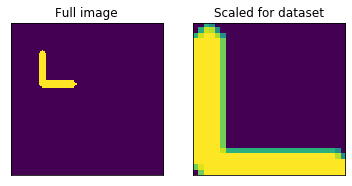

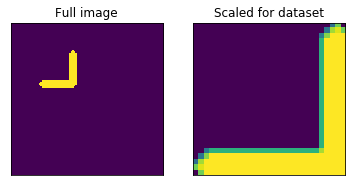

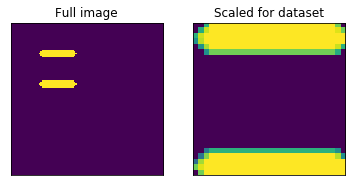

In [ ]:
## Example of drawing symbols
c = Canvas()
# L-symbol
c.clear()
c.stroke([[20, 20], [20, 40], [40, 40]])
c.draw()
# anti-L symbol
c.clear()
c.stroke([[20, 40], [40, 40], [40, 20]])
c.draw()
# = symbol
c.clear()
c.stroke([[20, 40], [40, 40]])
c.stroke([[20, 20], [40, 20]])
c.draw()

In [ ]:
# CREATION OF THE DATASET
X = []
y = []
c = Canvas()

for a in [-10, -5, 0, 5, 10]:
  c.clear()
  c.stroke([[20, 20], [20, 40], [40, 40]])
  c.rotate(a)
  X.append(c.get_array_for_dataset())
  y.append(0)


for a in [-10, -5, 0, 5, 10]:
  c.clear()
  c.stroke([[20, 40], [40, 40], [40, 20]])
  c.rotate(a)
  X.append(c.get_array_for_dataset())
  y.append(1)

Complete the following code
* Perform PCA on your custom symbols and plot the cumulative explained variance ratio as a function of the number of components.
* Think what number of components you would choose for further recognition.

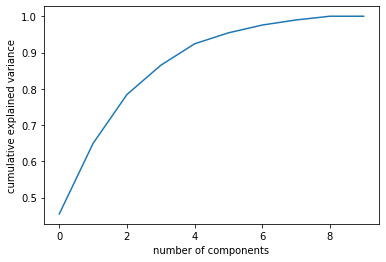

In [ ]:
from sklearn.decomposition import PCA

# Enter your code here
# X contains features, y -- classes

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Complete the following code
* As a step aside consider PCA with $3$ components.
* Transform your dataset accordingly and put the result into `projected` variable.
* The rest of the code contains visualization, use it to check whether the components are separable.
* Think which method looks perspectively to separate the data as good as possible (Bayes, Linear SVM, Kernelized SVM, Decision Tree, Random Forest, etc.)

In [ ]:
from sklearn.decomposition import PCA

# Enter your code here
# X contains features, y -- classes
projected =



import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[d] for d in y]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=projected[:, 0], y=projected[:, 1], z=projected[:, 2], mode='markers',
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False,
                  title_text="3-component PCA for your dataset",
                  scene={"xaxis": {"title": "component 1"},
                         "yaxis": {"title": "component 2"},
                         "zaxis": {"title": "component 3"}},
                  showlegend=False)

fig.show()

Complete the following code

* Create a pipeline with PCA and the method you chose.
* Train the classifier, check wether it works well with hand-drawn symbols.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Enter training code here

names = {0: "L", 1:"anti-L"}

def process_symbol(num_img):
    # Enter classification code here
  num_pred =
  return names[num_pred]

In [ ]:
#@title #Visualization code
import IPython
from google.colab import output
import numpy as np
import json

def do_recognition(array_8x8):
  arr = np.transpose(np.array(array_8x8))
  return IPython.display.JSON({'msg': process_symbol(arr)})

main_str = '''
<body>
  	<div id="paint">
  		<canvas id="myCanvas" width="600" height="600"
              onmousedown="start_paint(event)"
              onmousemove="do_paint(event)"
              onmouseup="stop_paint(event)"
              style="border:3px solid #000000;">
      </canvas>
	  </div>
    <div style="position:absolute; top:0px; left:625px;">
        <h2> Cropped image </h2>
        <img id="partial_image" style="width:80px; height:80px; border:3px solid #000000;">
        <h2> Scaled </h2>
        <canvas id="bin_canvas" width="80" height="80"
              style="border:3px solid #000000;">
        </canvas>
        <h2> Recognize symbol </h2>
        <button type="button" onclick="process_data();">
        Do recognition
        </button>
        <h2> Clean canvas </h2>
        <button type="button" onclick="clear_canvas();">
        Clean
        </button>
        <h2> Recognition result </h2>
        <div id="rec_res" style="font-size:40px;"></div>
    </div>
<script>

var canvas = document.getElementById('myCanvas');
var ctx = canvas.getContext('2d');
var canvas_2 = document.getElementById("bin_canvas");
var ctx_2 = canvas_2.getContext("2d");
var mouse = {x: 0, y: 0, state: 0, min_x: 600, max_x: 0, min_y: 600, max_y: 0};
var full_image = ctx.getImageData(0, 0, 600, 600);
var partial_image = document.getElementById('partial_image');
var binarized = null;

var N_scaled = 28;

ctx.lineJoin = 'round';
ctx.lineCap = 'round';


function start_paint(e)
{
  ctx.putImageData(full_image, 0, 0);
  mouse.state = 1;
  ctx.beginPath();
  ctx.moveTo(mouse.x, mouse.y);
}

var line_width = 28;

function do_paint(e)
{
  mouse.x = e.pageX - 10;
  mouse.y = e.pageY - 10;
  if (!mouse.state)
    return;
  ctx.lineTo(mouse.x, mouse.y);
  ctx.lineWidth = line_width;
  ctx.strokeStyle = '#000000';
  ctx.stroke();
  full_image = ctx.getImageData(0, 0, 600, 600);
  if (mouse.min_x > mouse.x)
    mouse.min_x = mouse.x;
  if (mouse.min_y > mouse.y)
    mouse.min_y = mouse.y;
  if (mouse.max_x < mouse.x)
    mouse.max_x = mouse.x;
  if (mouse.max_y < mouse.y)
    mouse.max_y = mouse.y;
}

function stop_paint(e)
{
  mouse.state = 0;
  full_image = ctx.getImageData(0, 0, 600, 600);

  c_x = (mouse.max_x + mouse.min_x) / 2;
  c_y = (mouse.max_y + mouse.min_y) / 2;
  a = Math.max(mouse.max_x - mouse.min_x, mouse.max_y - mouse.min_y);
  a += line_width;
  var part = ctx.getImageData(c_x - a/2, c_y - a/2, a, a);
  partial_image.src = getImageURL(part);

  binarized = Array(N_scaled).fill(0).map(x => Array(N_scaled).fill(0))
  var counts = Array(N_scaled).fill(0).map(x => Array(N_scaled).fill(0))

  for (var idx_y = 0; idx_y < part.height; idx_y += 1)
    for (var idx_x = 0; idx_x < part.width; idx_x += 1)
    {
      counts[Math.floor(N_scaled * idx_x / part.width)][Math.floor(N_scaled * idx_y / part.height)] += 1;
      if (part.data[idx_y * part.width * 4 + idx_x * 4 + 3] > 1)
      	binarized[Math.floor(N_scaled * idx_x / part.width)][Math.floor(N_scaled * idx_y / part.height)] += 1;
    }

  for (var i = 0; i < N_scaled; i++)
    for (var j = 0; j < N_scaled; j++)
      binarized[i][j] = binarized[i][j] / counts[i][j];

  ctx_2.fillStyle = "rgba(255, 255, 255, 255)";
  ctx_2.fillRect(0, 0, canvas_2.width, canvas_2.height);
  for (var i = 0; i < N_scaled; i++)
    for (var j = 0; j < N_scaled; j++)
    {
      var c = Math.floor(255 - 255*binarized[i][j]);
      var x = Math.floor(canvas_2.width / N_scaled * i);
      var y = Math.floor(canvas_2.height / N_scaled * j);
      var dx = Math.floor(canvas_2.width / N_scaled + 1);
      var dy = Math.floor(canvas_2.height / N_scaled + 1);
      ctx_2.fillStyle = "rgba(" + [c, c, c, 255].join(",") + ")";
      ctx_2.fillRect(x, y, dx, dy);
    }

  ctx.lineWidth = 2;
  ctx.strokeStyle = '#FF0000';
  ctx.strokeRect(c_x - a/2, c_y - a/2, a, a);
}

function getImageURL(imgData)
{
   var canvas = document.createElement('canvas');
   var ctx = canvas.getContext('2d');
   canvas.width = imgData.width;
   canvas.height = imgData.height;
   ctx.putImageData(imgData, 0, 0);
   return canvas.toDataURL(); //image URL
}

async function process_data()
{
  const result = await google.colab.kernel.invokeFunction('notebook.DoRec', [binarized], {});
  params = result.data['application/json'];
  document.getElementById('rec_res').innerHTML = params.msg;
}

function clear_canvas()
{
  mouse = {x: 0, y: 0, state: 0, min_x: 600, max_x: 0, min_y: 600, max_y: 0};
  binarized = null;
  ctx.clearRect(0, 0, canvas.width, canvas.height);
  full_image = ctx.getImageData(0, 0, 600, 600);
  ctx_2.clearRect(0, 0, 80, 80);
  var part = ctx.getImageData(0, 0, 80, 80);
  partial_image.src = getImageURL(part);
  document.getElementById('rec_res').innerHTML = "";
}

    </script>
  </body>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.DoRec', do_recognition)

* Try different settings: turn PCA on and off and check whether everything works better.
* Enrich your dataset with rotated and blurred symbols. Canvas already contains
    - `rotate` to rotate symbol
    - `blur` to blur symbol
    - feel free to use draw whenever you are not sure, what you've drawed
* Repeat plotting cumulative variance and PCA with $3$ components.
* Retrain your classifier and check whether it gets better.
* Enrich your dataset with somehow warped symbols (think about some randomization when calling `stroke`) and repeat the workflow.